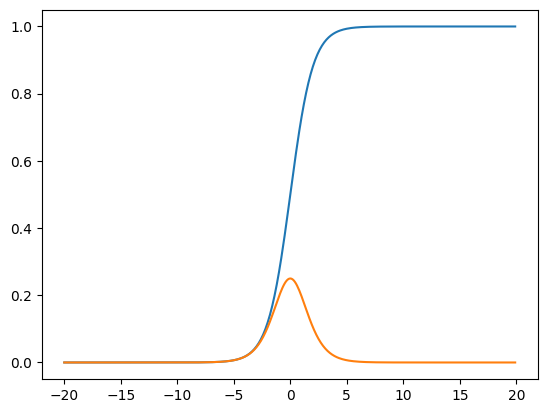

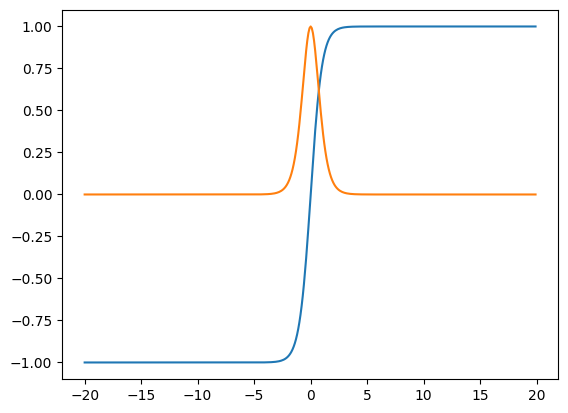

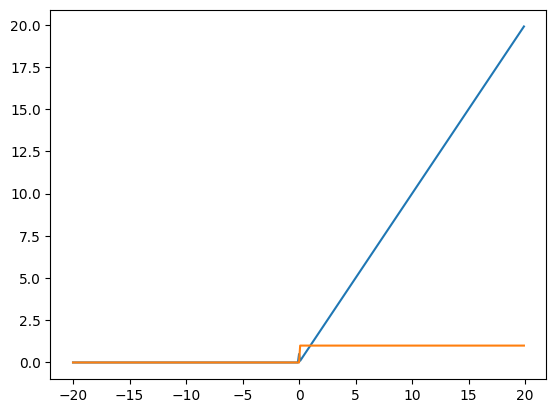

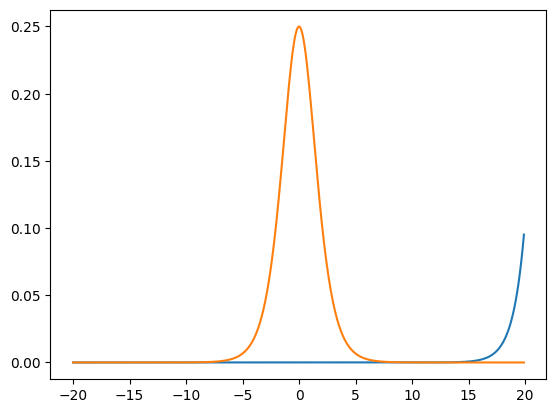

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plot_x = np.array(list(range(-200, 200)))
plot_x = plot_x/10

def plot_func(x, y, y1):
  print()
  plt.plot(x, y)
  plt.plot(x, y1)
  plt.show()
  print()

def sigmoid(x):
  return 1/(1+np.exp(-x))

def derivative_sigmoid(x):
  return np.exp(-x)/((1+np.exp(-x))**2)

plot_func(plot_x, sigmoid(plot_x), derivative_sigmoid(plot_x))


def tanH(x):
  return np.tanh(x)

def derivative_tanH(x):
  return 1/(np.cosh(x))**2

plot_func(plot_x, tanH(plot_x), derivative_tanH(plot_x))


def ReLu(x):
  x = np.where(x==0, 0.5, x)
  x = np.where(x<0, 0, x)
  return x

def derivative_ReLu(x):
  return np.where(x<=0, 0, 1)

plot_func(plot_x, ReLu(plot_x), derivative_ReLu(plot_x))


def softmax(x):
  return np.exp(x)/np.sum(np.exp(x))

def derivative_softmax(x):
  return derivative_sigmoid(x)

plot_func(plot_x, softmax(plot_x), derivative_softmax(plot_x))

In [ ]:
x = np.array([ [0, 1.0], [1.0, 0], [1.0, 1.0],[0, 0] ])
y = np.array([ [1.0], [1.0], [0], [0]])

num_input = 2
num_hidden = 5
num_output = 1


In [ ]:
from sklearn.metrics import accuracy_score
alpha = 0.01
num_iterations = 4000

def NN(func=sigmoid, func_derivative=derivative_sigmoid, title="sigmoid"):

  def cost_function(y, y_hat):
    J = 0.5*sum((y-y_hat)**2)
    return J


  print()
  Wxh = np.random.randn(num_input,num_hidden)
  bh = np.zeros((1,num_hidden))

  Why = np.random.randn (num_hidden,num_output)
  by = np.zeros((1,num_output))
  cost = []

  def forward_prop(x,Wxh,Why, func=sigmoid):
    z1 = np.dot(x,Wxh) + bh
    a1 = func(z1)
    z2 = np.dot(a1,Why) + by
    y_hat = func(z2)

    return z1,a1,z2,y_hat

  def backword_prop(y_hat, z1, a1, z2, func_derivative=derivative_sigmoid):
      delta2 = np.multiply(-(y-y_hat), func_derivative(z2))
      dJ_dWhy = np.dot(a1.T, delta2)
      delta1 = np.dot(delta2,Why.T)*func_derivative(z1)
      dJ_dWxh = np.dot(x.T, delta1)

      return dJ_dWxh, dJ_dWhy

  for i in range(num_iterations):

      #perform forward propagation and predict output
      z1,a1,z2,y_hat = forward_prop(x,Wxh,Why, func)

      #perform backward propagation and calculate gradients
      dJ_dWxh, dJ_dWhy = backword_prop(y_hat, z1, a1, z2, func_derivative)

      #update the weights
      Wxh = Wxh -alpha * dJ_dWxh
      Why = Why -alpha * dJ_dWhy

      #compute cost
      c = cost_function(y, y_hat)

      #store the cost
      cost.append(c)

  _, _, _, y_hat = forward_prop(x,Wxh,Why, func)
  print(y, np.around(y_hat))
  print(title, accuracy_score(y, np.around(y_hat)))
  plt.grid()
  plt.plot(range(num_iterations),cost)

  plt.title('Cost Function')
  plt.xlabel('Training Iterations')
  plt.ylabel('Cost')
  plt.show()
  print()


[[1.]
 [1.]
 [0.]
 [0.]] [[1.]
 [1.]
 [1.]
 [0.]]
sigmoid 0.75


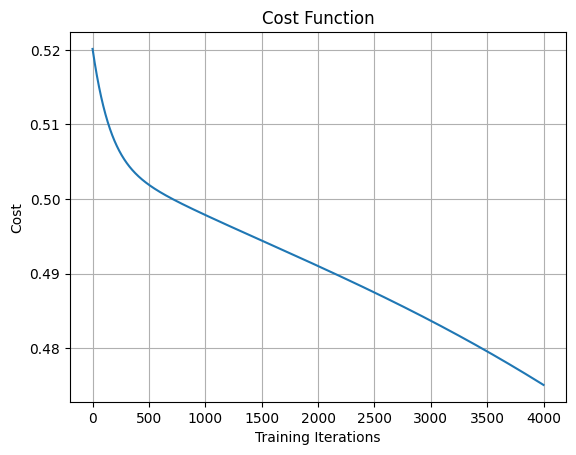



[[1.]
 [1.]
 [0.]
 [0.]] [[1.]
 [1.]
 [0.]
 [0.]]
tanh 1.0


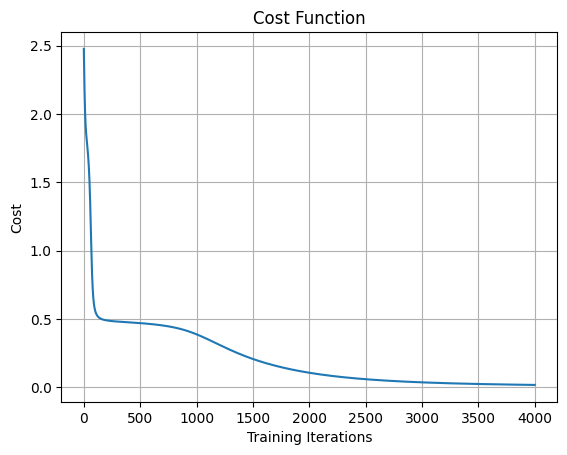



[[1.]
 [1.]
 [0.]
 [0.]] [[0.]
 [0.]
 [0.]
 [0.]]
ReLu 0.5


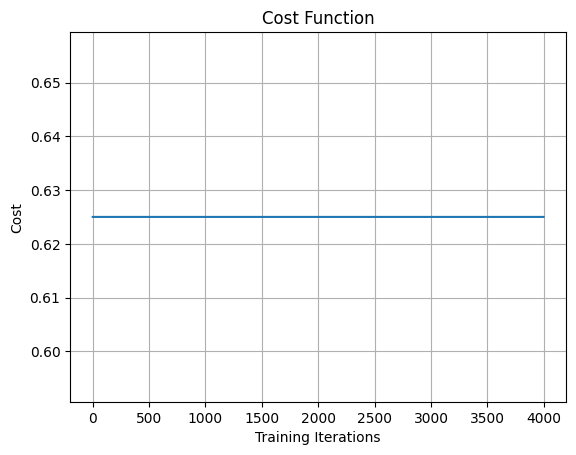



[[1.]
 [1.]
 [0.]
 [0.]] [[0.]
 [0.]
 [0.]
 [0.]]
Softmax 0.5


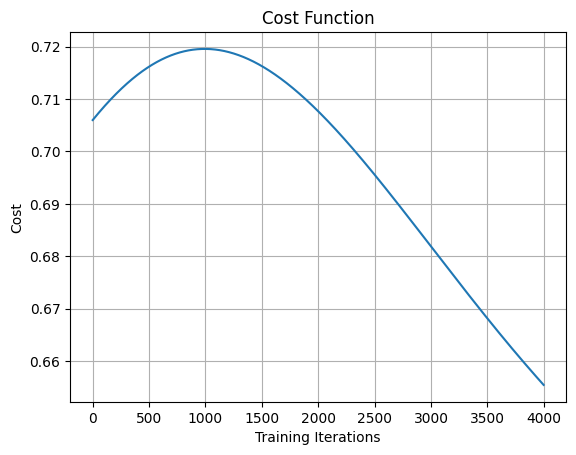

In [ ]:
NN()
NN(tanH, derivative_tanH, "tanh")
NN(ReLu, derivative_ReLu, "ReLu")
NN(softmax, derivative_softmax, "Softmax")

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier().fit(x, y)
accuracy_score(y, clf.predict(x))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


1.0